In [3]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('HyP_2020_Terceros.csv')

df = df.rename(columns={
    'numero': 'id_hogar',
    'e26': 'sexo',
    'e27': 'edad',
    'e563': 'genero',
    'e29_6': 'ascendencia',
    'e30': 'parentesco',
    'pobpcoac': 'estado_laboral',
    'g126_1': 'sueldo'
    })

df = df[['id_hogar', 'sexo', 'edad', 'genero', 'ascendencia', 'parentesco', 'estado_laboral', 'nper', 'sueldo']]

df['sexo'] = df['sexo'].astype('category')
df['nper'] = df['nper'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145166 entries, 0 to 145165
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id_hogar        145166 non-null  int64   
 1   sexo            145166 non-null  category
 2   edad            145166 non-null  float64 
 3   genero          145166 non-null  object  
 4   ascendencia     145166 non-null  object  
 5   parentesco      145166 non-null  object  
 6   estado_laboral  145166 non-null  object  
 7   nper            145166 non-null  category
 8   sueldo          145166 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(4)
memory usage: 8.0+ MB


In [5]:
df.describe()

,id_hogar,edad,sueldo
count,145166.000000,145166.000000,145166.000000
mean,29654.766805,41.179684,9711.315577
std,16856.020610,23.657247,20269.848604
min,1.000000,0.000000,0.000000
25%,14894.000000,20.000000,0.000000
50%,29714.500000,42.000000,0.000000
75%,44441.750000,60.000000,15000.000000
max,58594.000000,98.000000,600000.000000


In [6]:
df.sample(5) 

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
101918,51774,2.0,16.0,Mujer,Sin dato,Sin dato,"Inactivo, estudiante",9.0,0.0
134856,27166,1.0,82.0,Varón,Blanca,Jefe/a de hogar,"Inactivo, jubilado",1.0,0.0
70654,39092,1.0,56.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,57000.0
3447,11212,1.0,50.0,Varón,Blanca,Otro no pariente,Ocupados,4.0,0.0
15740,16468,2.0,53.0,Mujer,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,0.0


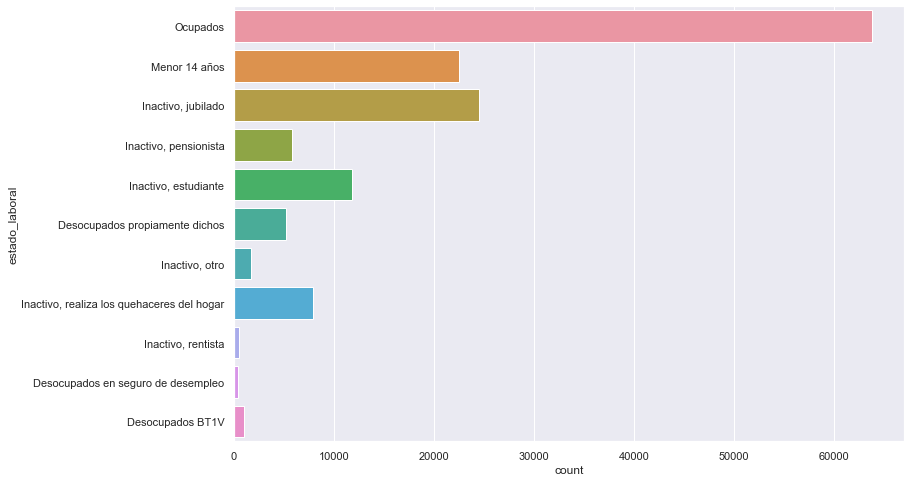

In [7]:
ax = sns.countplot(y=df['estado_laboral'])

# ax.bar_label(ax.containers[0])

In [8]:
df['sueldo'].max()

600000.0

In [9]:
df = df[df['sueldo'] > 0]

df = df[df['sueldo'] < df['sueldo'].max()]

In [10]:
df.describe() 

,id_hogar,edad,sueldo
count,43450.000000,43450.000000,43450.000000
mean,27658.446697,41.874868,32431.595788
std,16792.930497,12.516046,25053.949035
min,2.000000,3.000000,200.000000
25%,12929.500000,32.000000,18000.000000
50%,26490.500000,42.000000,27000.000000
75%,42003.750000,51.000000,40000.000000
max,58589.000000,93.000000,380000.000000


In [11]:
df['sueldo'].mode()

0    30000.0
dtype: float64

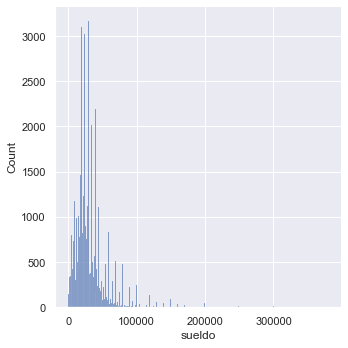

In [12]:
sns.displot(df['sueldo'])

<AxesSubplot:xlabel='sexo', ylabel='sueldo'>

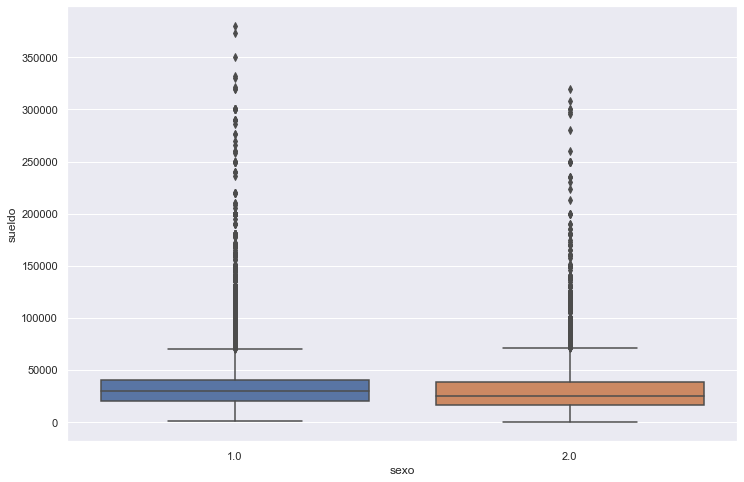

In [13]:
sns.boxplot(data=df, x=df['sexo'], y=df['sueldo'])

In [14]:
df

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
0,100,2.0,38.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,86000.0
1,100,1.0,39.0,Varón,Blanca,Esposo/a o compañero/a,Ocupados,2.0,80000.0
8,10001,1.0,62.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,56000.0
9,10001,2.0,39.0,Mujer,Afro o negra,Esposo/a o compañero/a,Ocupados,2.0,32000.0
15,10007,1.0,41.0,Varón,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,15000.0
...,...,...,...,...,...,...,...,...,...
145159,9990,1.0,51.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,46000.0
145160,9991,2.0,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145161,9992,2.0,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145162,9993,1.0,51.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,48000.0


In [15]:
quantil_99 = df['sueldo'].quantile(0.99)
print(quantil_99)

df_no_outliers = df[df['sueldo'] < quantil_99]

130000.0


In [16]:
quartil_1 = df_no_outliers['sueldo'].quantile(0.25)
quartil_3 = df_no_outliers['sueldo'].quantile(0.75)

iqr =  quartil_3 - quartil_1

print(quartil_1)
print(quartil_3)
print(iqr)

18000.0
40000.0
22000.0


In [17]:
df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] < quartil_3 + 1.5 * iqr]

df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] > quartil_1 - 1.5 * iqr]

df_no_outliers

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
8,10001,1.0,62.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,56000.0
9,10001,2.0,39.0,Mujer,Afro o negra,Esposo/a o compañero/a,Ocupados,2.0,32000.0
15,10007,1.0,41.0,Varón,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,15000.0
16,10007,2.0,35.0,Mujer,Asiática o amarilla,Esposo/a o compañero/a,Ocupados,2.0,35000.0
17,10007,1.0,21.0,Varón,Asiática o amarilla,Hijo/a solo del esposo/a compañero/a,Ocupados,3.0,15000.0
...,...,...,...,...,...,...,...,...,...
145159,9990,1.0,51.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,46000.0
145160,9991,2.0,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145161,9992,2.0,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145162,9993,1.0,51.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,48000.0


<AxesSubplot:xlabel='sexo', ylabel='sueldo'>

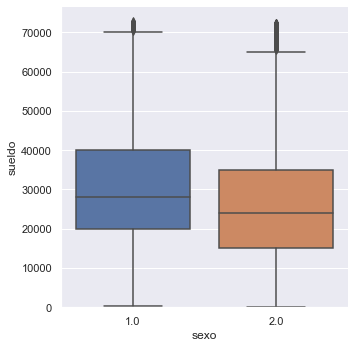

In [18]:
sns.displot(df_no_outliers['sueldo'])

sns.boxplot(data=df_no_outliers, x='sexo', y='sueldo')

In [19]:
df_no_outliers

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
8,10001,1.0,62.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,56000.0
9,10001,2.0,39.0,Mujer,Afro o negra,Esposo/a o compañero/a,Ocupados,2.0,32000.0
15,10007,1.0,41.0,Varón,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,15000.0
16,10007,2.0,35.0,Mujer,Asiática o amarilla,Esposo/a o compañero/a,Ocupados,2.0,35000.0
17,10007,1.0,21.0,Varón,Asiática o amarilla,Hijo/a solo del esposo/a compañero/a,Ocupados,3.0,15000.0
...,...,...,...,...,...,...,...,...,...
145159,9990,1.0,51.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,46000.0
145160,9991,2.0,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145161,9992,2.0,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0
145162,9993,1.0,51.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,48000.0


<AxesSubplot:>

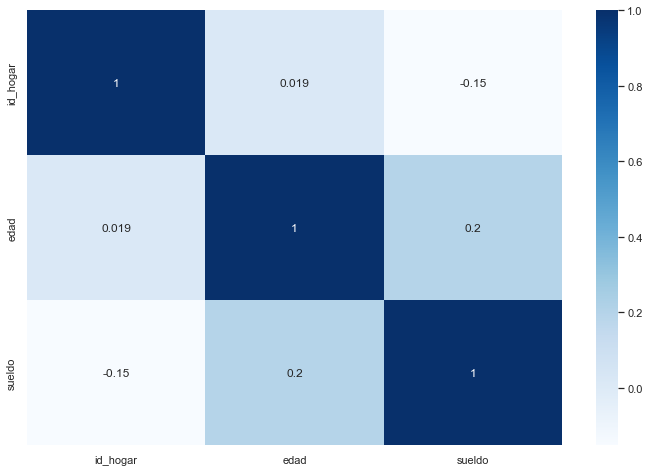

In [21]:
#frecuencia relativa de sueldo

sns.heatmap(df_no_outliers.corr(), annot=True, cmap='Blues')
